# Mạth - Assignment 5,6

### 5. Implement Linear Regression, Logistic Regression, and SoftMax Regression in the following fashions:
- Using numpy only
- Using Tensorflow / Pytorch

### 6.Visualize the training process of the following models:
- Linear Regression
- Logistic Regression
- SoftMax Regression

Indicators:
 + Training loss,  validation loss
 + Classifier visualization

## Session 1: Linear Regression

## Numpy implement

In [7]:
import pandas as pd
#Load the libraries and data...
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import numpy as np
from sklearn import datasets

data = pd.read_csv('./data/train.csv')
x = data['GrLivArea']
y = data['SalePrice']
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 
y = (y - y.mean()) / y.std()


alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values 

def linear_gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        if i % 200 == 0:
             print("step: %i, loss: %f" % (i, cost))
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = linear_gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,frames=300, interval=0, blit=True)
anim.save('animation.gif', writer='imagemagick', fps = 30)

step: 0, loss: 0.580476
step: 200, loss: 0.254714
step: 400, loss: 0.248862
step: 600, loss: 0.248757
step: 800, loss: 0.248755
step: 1000, loss: 0.248755
step: 1200, loss: 0.248755
step: 1400, loss: 0.248755
step: 1600, loss: 0.248755
step: 1800, loss: 0.248755



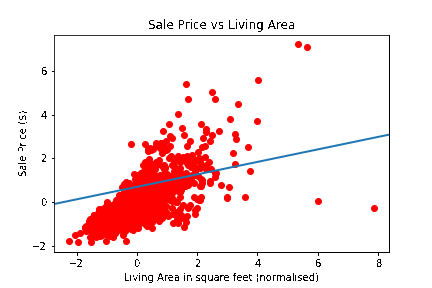

In [8]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

## Tensorflow implementation

step: 100, loss: 0.501672, W: 0.747859, b: 0.051216
step: 200, loss: 0.497584, W: 0.713835, b: 0.006792
step: 300, loss: 0.497512, W: 0.709316, b: 0.000901
step: 400, loss: 0.497510, W: 0.708716, b: 0.000119
step: 500, loss: 0.497510, W: 0.708637, b: 0.000016
step: 600, loss: 0.497510, W: 0.708626, b: 0.000002
step: 700, loss: 0.497510, W: 0.708626, b: 0.000000
step: 800, loss: 0.497510, W: 0.708626, b: 0.000000
step: 900, loss: 0.497510, W: 0.708626, b: 0.000000
step: 1000, loss: 0.497510, W: 0.708626, b: 0.000000
step: 1100, loss: 0.497510, W: 0.708626, b: 0.000000
step: 1200, loss: 0.497510, W: 0.708626, b: -0.000000
step: 1300, loss: 0.497510, W: 0.708626, b: -0.000000
step: 1400, loss: 0.497510, W: 0.708626, b: -0.000000
step: 1500, loss: 0.497510, W: 0.708626, b: -0.000000
step: 1600, loss: 0.497510, W: 0.708626, b: -0.000000
step: 1700, loss: 0.497510, W: 0.708626, b: -0.000000
step: 1800, loss: 0.497510, W: 0.708626, b: -0.000000
step: 1900, loss: 0.497510, W: 0.708626, b: -0.0

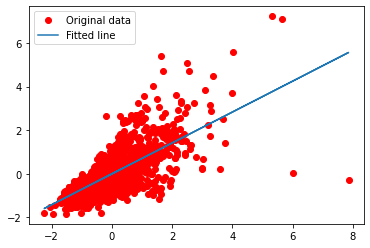

In [40]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random
# Parameters.
learning_rate = 0.01
training_steps = 2000
display_step = 100

x = data['GrLivArea']
y = data['SalePrice']
x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

def linear_regression(x):
    return W * x + b

def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

optimizer = tf.optimizers.SGD(learning_rate)

# Optimization process. 
def run_optimization():
    with tf.GradientTape() as g:
        pred = linear_regression(x)
        loss = mean_square(pred, y)

    gradients = g.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
for step in range(1, training_steps + 1):
    run_optimization()
    if step % display_step == 0:
        pred = linear_regression(x)
        loss = mean_square(pred, y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))
        
# Display
plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, W * x + b, label='Fitted line')
plt.legend()
plt.show()

## Pytorch Implementation

Epoch [20/200], Loss: 1.2701
Epoch [40/200], Loss: 0.8420
Epoch [60/200], Loss: 0.6513
Epoch [80/200], Loss: 0.5662
Epoch [100/200], Loss: 0.5283
Epoch [120/200], Loss: 0.5114
Epoch [140/200], Loss: 0.5039
Epoch [160/200], Loss: 0.5005
Epoch [180/200], Loss: 0.4991
Epoch [200/200], Loss: 0.4984


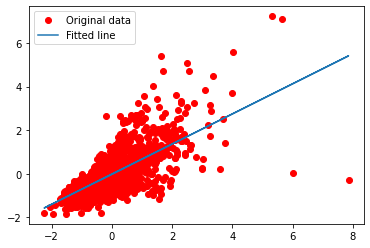

In [67]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 200
learning_rate = 0.01

x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()
x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

# model = nn.Linear(x.shape[0], y.size)
model = nn.Linear(input_size, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
model.train()
# Train the model
for epoch in range(num_epochs):
    inputs = torch.from_numpy(x).unsqueeze(1).float()
    targets = torch.from_numpy(y).unsqueeze(1).float()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 20 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
model.eval()
predicted = model(torch.from_numpy(x).unsqueeze(1).float()).detach().numpy()
plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predicted, label='Fitted line')
plt.legend()
plt.show()